In [1]:
from keras_retinanet.preprocessing.coco_kp import CocoGeneratorKeypoint
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2
import keras.preprocessing.image
import keras

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
coco_path = '/media/muhammed/Other/RESEARCH/datasets/MSCOCO/coco/'
val_image_data_generator = keras.preprocessing.image.ImageDataGenerator()

In [3]:
val_generator = CocoGeneratorKeypoint(
    coco_path,
    'val2017',
    val_image_data_generator,
    batch_size=4
)

loading annotations into memory...
Done (t=0.28s)
creating index...
index created!


In [22]:
o = next(val_generator)

/media/muhammed/Other/RESEARCH/datasets/MSCOCO/coco/images/val2017/000000424162.jpg
/media/muhammed/Other/RESEARCH/datasets/MSCOCO/coco/images/val2017/000000121591.jpg
/media/muhammed/Other/RESEARCH/datasets/MSCOCO/coco/images/val2017/000000302882.jpg
/media/muhammed/Other/RESEARCH/datasets/MSCOCO/coco/images/val2017/000000174371.jpg
3
1
1
6
[1.0, 0, 0, 0, 0, 0, 0]
[1.0, 0, 0, 0, 0, 0, 0]
[1.0, 0, 0, 0, 0, 0, 0]
[1.28, 0, 0, 0, 0, 0, 0]
[1.28, 0, 0, 0, 0, 0, 0]
[1.0, 0, 1.0, 0, 0, 0, 0]
[1.0, 0, 1.0, 0, 0, 0, 0]
[1.0, 0, 1.0, 0, 0, 0, 0]
[1.0, 0, 1.0, 0, 0, 0, 0]
[1.0, 0, 1.0, 0, 0, 0, 0]
[1.0, 0, 1.0, 0, 0, 0, 0]


In [7]:
print o[0][0][1].shape

(512, 640, 3)


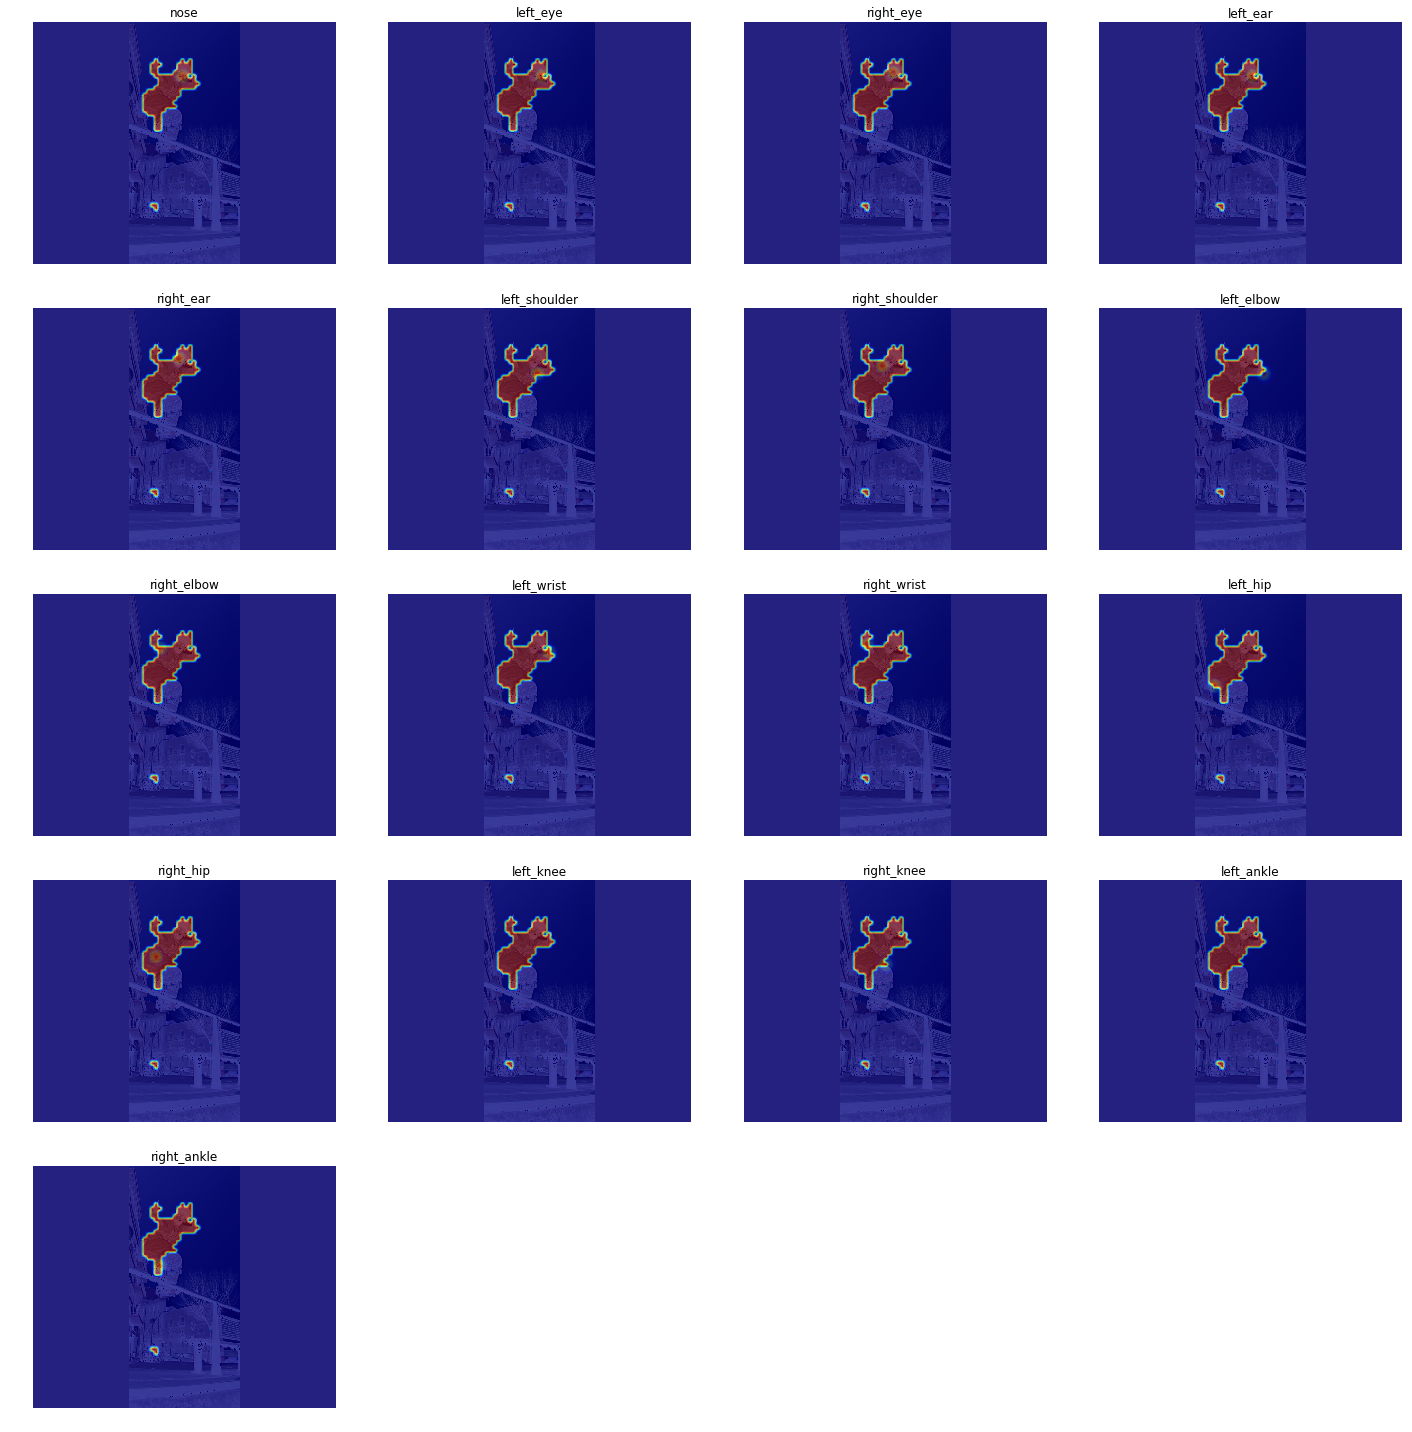

In [126]:
idx = 1
ch = 1

f, axarr = plt.subplots(5, 4)
f.set_size_inches((20, 20))
part_list = ['nose', 'left_eye', 'right_eye', 'left_ear', 'right_ear', 'left_shoulder', 'right_shoulder',
             'left_elbow', 'right_elbow', 'left_wrist', 'right_wrist', 'left_hip', 'right_hip', 'left_knee', 
             'right_knee', 'left_ankle', 'right_ankle']
for ch in range(17):
    axarr[ch//4,ch%4].axis('off')
    axarr[ch//4,ch%4].set_title(part_list[ch])
    axarr[ch//4,ch%4].imshow(o[0][0][idx])
    heat = o[1][2][idx,:,:,ch]
    heat = cv2.resize(heat, (o[0][0][idx].shape[1], o[0][0][idx].shape[0]), cv2.INTER_CUBIC)
    mask = o[0][1][idx,:,:,0]
    mask = cv2.resize(mask, (o[0][0][idx].shape[1], o[0][0][idx].shape[0]), cv2.INTER_CUBIC)
    axarr[ch//4,ch%4].imshow(heat, alpha=.4, cmap='jet', interpolation='none')
    axarr[ch//4,ch%4].imshow(mask, alpha=.6, cmap='jet', interpolation='none')

for j in range(1,4):
    axarr[4,j].axis('off')
    axarr[4,j].imshow(np.ones((384,256,3)))
# f.tight_layout()
f.set_tight_layout(tight=True)

/media/muhammed/Other/RESEARCH/datasets/MSCOCO/coco/images/val2017/000000476415.jpg
/media/muhammed/Other/RESEARCH/datasets/MSCOCO/coco/images/val2017/000000426203.jpg
/media/muhammed/Other/RESEARCH/datasets/MSCOCO/coco/images/val2017/000000394559.jpg
/media/muhammed/Other/RESEARCH/datasets/MSCOCO/coco/images/val2017/000000476514.jpg
1
2
1
2
[0.8012519561815337, 156.0, 0, 14, 0, 425, 639]
[0.8407224958949097, 203.0, 0, 145, 30, 425, 639]
[0.8407224958949097, 203.0, 0, 145, 30, 425, 639]
[0.9941747572815534, 175.0, 0, 133, 124, 425, 639]
[0.8012519561815337, 150.0, 0, 0, 0, 425, 639]
[0.8012519561815337, 150.0, 0, 0, 0, 425, 639]
1.0


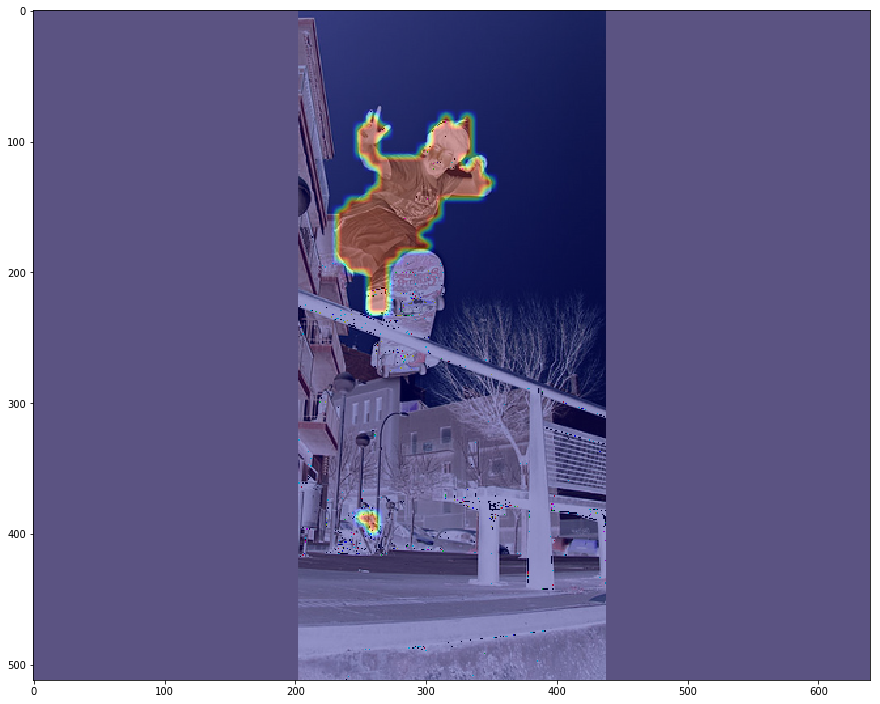

In [124]:
o = next(val_generator)
idx = 1
ch = 0
# img = cv2.imread('/media/muhammed/Other/RESEARCH/datasets/MSCOCO/coco/images/val2017/000000459195.jpg')
plt.figure(figsize=(15,15))
# plt.imshow(img[:,:,::-1])
# plt.imshow(cv2.resize(img[:,:,::-1], (752, 600), cv2.INTER_CUBIC))
plt.imshow(o[0][0][idx])
# plt.imshow(cv2.resize(o[1][2][idx,:,:,ch], (640,512), cv2.INTER_CUBIC), alpha=.4, cmap='jet')
mask = o[0][1][idx,:,:,4]
mask = cv2.resize(mask, (o[0][0][idx].shape[1], o[0][0][idx].shape[0]), cv2.INTER_CUBIC)
plt.imshow(cv2.resize(mask, (640,512), cv2.INTER_CUBIC), alpha=.4, cmap='jet')
# plt.imshow(o[1][2][idx,:,:,ch], cmap='jet')
print o[1][2][idx,:,:,ch].max()

In [24]:
import scipy
heatmap_avg = o[1][2][idx]
print heatmap_avg.shape

from scipy.ndimage.filters import gaussian_filter
all_peaks = []
peak_counter = 0

for part in range(17):
    x_list = []
    y_list = []
    map_ori = heatmap_avg[:,:,part]
    map = gaussian_filter(map_ori, sigma=1)
    
    map_left = np.zeros(map.shape)
    map_left[1:,:] = map[:-1,:]
    map_right = np.zeros(map.shape)
    map_right[:-1,:] = map[1:,:]
    map_up = np.zeros(map.shape)
    map_up[:,1:] = map[:,:-1]
    map_down = np.zeros(map.shape)
    map_down[:,:-1] = map[:,1:]
    
    peaks_binary = np.logical_and.reduce((map>=map_left, map>=map_right, map>=map_up, map>=map_down, map > .99))
    peaks = zip(np.nonzero(peaks_binary)[1], np.nonzero(peaks_binary)[0]) # note reverse
    peaks_with_score = [x + (map_ori[x[1],x[0]],) for x in peaks]
    id = range(peak_counter, peak_counter + len(peaks))
    peaks_with_score_and_id = [peaks_with_score[i] + (id[i],) for i in range(len(id))]

    all_peaks.append(peaks_with_score_and_id)
    peak_counter += len(peaks)

(578, 1024, 17)


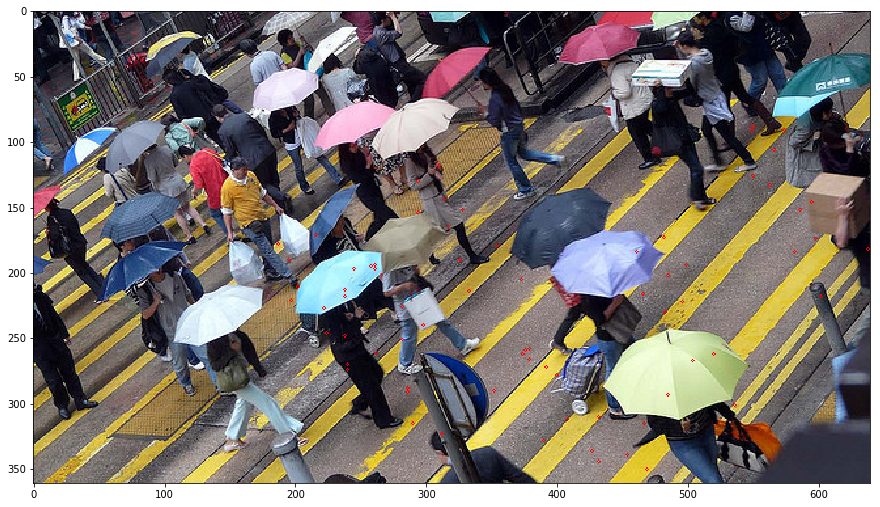

In [25]:
for t in range(17):
    p = all_peaks[t]
    for k in p:
        cv2.circle(img, (int(k[1]), int(k[0])), 1, [0,0,255])
        
plt.figure(figsize=(15,15))
plt.imshow(img[:,:,::-1])

In [14]:
from pycocotools.coco import COCO
iid = 24021
c = COCO('/media/muhammed/Other/RESEARCH/datasets/MSCOCO/coco/annotations/person_keypoints_val2017.json')

loading annotations into memory...
Done (t=0.43s)
creating index...
index created!


In [15]:
a = c.getAnnIds(imgIds=iid)
a = c.loadAnns(a)

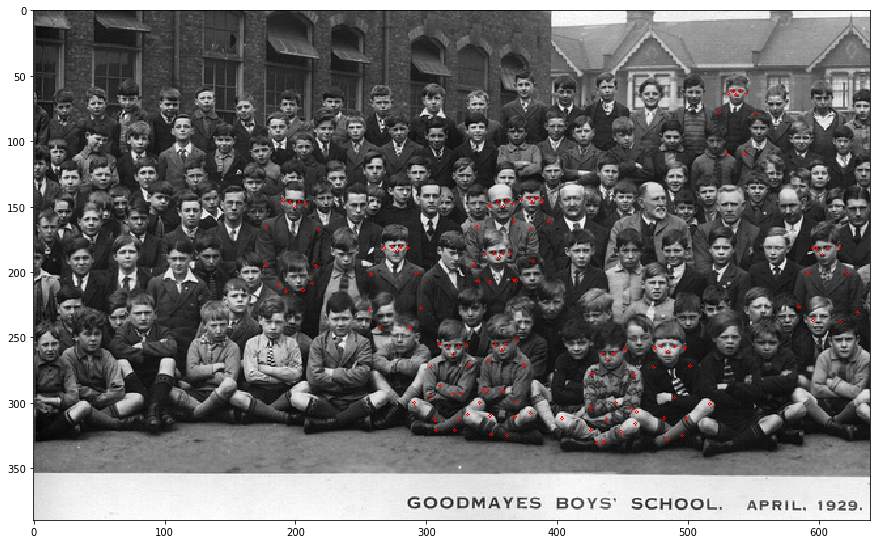

In [17]:
img = cv2.imread('/media/muhammed/Other/RESEARCH/datasets/MSCOCO/coco/images/val2017/000000024021.jpg')
plt.figure(figsize=(15,15))

for t in a:
    x = t['keypoints'][0::3]
    y = t['keypoints'][1::3]
    for n in zip(y,x):
        cv2.circle(img, (n[1], n[0]), 1, [0,0,255])
img = img[:,:,::-1]
plt.imshow(img)

In [3]:
from keras_retinanet.utils.gaussian_heatmap import gaussian
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
img = np.zeros((600, 800))
img[200, 300] = 1.0
img[250, 360] = 1.0
img[180, 400] = 1.0

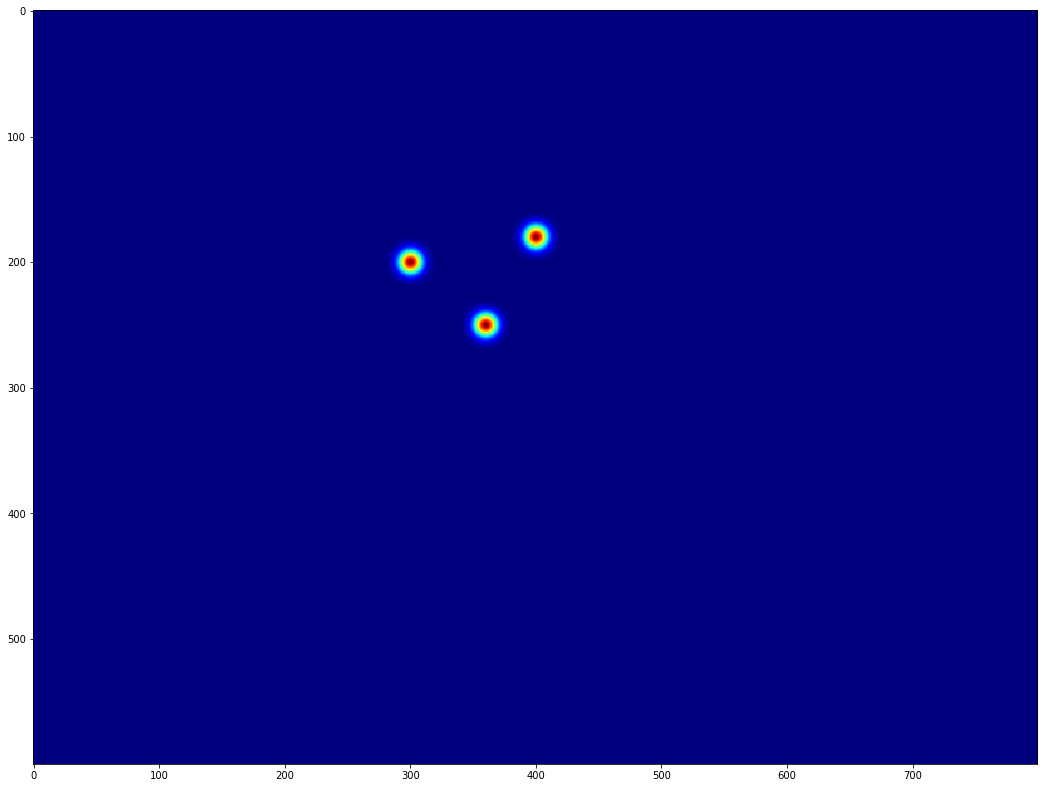

In [33]:
img = gaussian(img, N=37, sigma=2)
plt.figure(figsize=(18,18))
plt.imshow(img, interpolation='none', cmap='jet')